### Mie First
Mie theory provides a route to the exact solution to Maxwell's equations for light interacting with a spherical object; this is done by expanding the incident and scattered
light waves in a basis of multi-polar functions; hence one usually speaks about the dipolar contribution to scattering, the quadrupolar contribution, the octupolar, and so on.  For very large particles, many orders of this expansion may be needed, but for small particles the scattering and absorption is dominated by the dipolar contribution.  Hence, for spherical nanoparticles that are less than or equal to about 10 nm in diameter, the Mie theory expansion is truncated after only the first term.  As a concrete example, the Mie theory expression for the absorption of a small spherical nanoparticle is as follows:

\begin{equation}
\sigma_{abs}(\lambda) = \frac{2 \pi}{\lambda} {\rm Im}\left( \alpha(\lambda) \right),
\end{equation}
where $\alpha(\lambda)$ is the dipole polarizability given by
\begin{equation}
\alpha(\lambda) = 4 \pi r^3 \left( \frac{\epsilon_p(\lambda) - \epsilon_s}{\epsilon_p(\lambda) + 2\epsilon_s} \right)
\end{equation}
where $r$ is the radius of the particle, $\epsilon_p(\lambda)$ denotes the wavelength-dependent dielectric function of the material the particle is made from, $\epsilon_s$ denotes the dielectric function of the surroundings (or solvent) that the particle is immersed in, and ${\rm Im}$ means we will only take the imaginary part of the quotient (the dielectric function of the particle will typically be complex; if it is not, there will be no absorption).

We can use WPTherml to get the refractive index of materials as a function of wavelength, which is equivalent to the dielectric function as a function of wavelength by
\begin{equation}
\epsilon_p(\lambda) = n_p(\lambda)^2,
\end{equation}
where $n_p(\lambda)$ is the refractive index of the particle. 


In [1]:
pip install wptherml

     |████████████████████████████████| 1.1MB 2.8MB/s 


 Temperature not specified!
 Proceeding with default T = 300 K


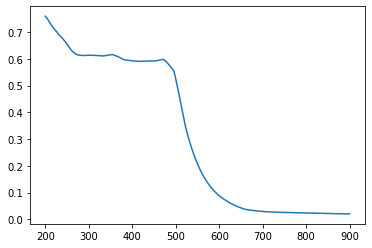

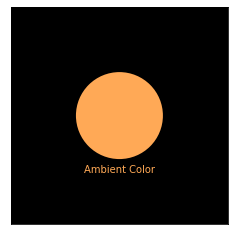

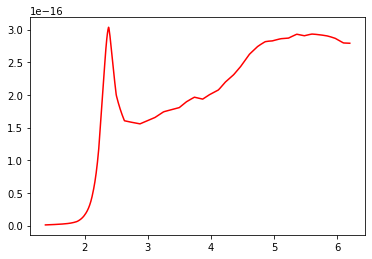

In [4]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
import numpy as np
from numpy import linalg as LA
import math
pi = np.pi

structure = {

        'Material_List': ['Air', 'Au', 'Air'],
        'Thickness_List': [0,  200e-9, 0],
        'Lambda_List': [200e-9, 900e-9, 2000],
     
        }

### create the silver object - call it sphere for no particular reason
sphere = multilayer(structure)
### get the refractive index of Ag (since it is layer 1 based on the structure above)
n_Ag = sphere.layer_ri(1)
### get the dielectric function of Ag
eps_Ag = n_Ag * n_Ag

plt.plot(sphere.lambda_array*1e9, sphere.emissivity_array)
plt.show()

### render color of the structure
sphere.ambient_color()

'''Lets compute the Mie theory absorption of a 3 nm Ag particle in water, which 
   has refractive index = 1.33, here!'''
r = 10e-9
eps_s = 1.33 **2
#
quotient = ((eps_Ag - eps_s )/ (eps_Ag + 2 * eps_s))
### compute the quotient whose Imaginary part you need from Mie theory expression here
#
alpha = 4 * pi * r**3 * quotient
#
pre = (2*pi) / sphere.lambda_array
### compute pre-factor that depends on wavelength and radius here! 
sigma_abs = pre * np.imag(alpha)
### compute full absorption spectrum here!

plt.plot(1240/(sphere.lambda_array*1e9), sigma_abs , 'red')###
#plt.plot(1240/(sphere.lambda_array*1e9), np.real(alpha), 'red')
#plt.plot(1240/(sphere.lambda_array*1e9), np.imag(alpha), 'blue')

plt.show()


